 # EEE511 - TEAM#14: Modelling Competition







In [8]:
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import *

data = pd.read_csv('IPG2211A2N.csv',index_col=0)


# second column: 'energy production'
data.columns = ['Energy Production']

# data['date'] = pd.date_range(start='1/1/1939', periods=len(data), freq='M')
# data['DATE']=data['date'].apply(lambda x : x.replace(day=1))
data.insert(0, '#', range(1, 1 + len(data)))
data


,#,Energy Production
DATE,,
1939-01-01,1,3.3842
1939-02-01,2,3.4100
1939-03-01,3,3.4875
1939-04-01,4,3.5133
1939-05-01,5,3.5133
...,...,...
2019-01-01,961,123.7687
2019-02-01,962,113.0736
2019-03-01,963,106.6538


In [22]:
# x values corresponding to dates

x = np.array(data['#'])

In [23]:
# y values of energy production

y = np.array(data['Energy Production'])

## The First Model (3 free parameters)

In [24]:
# 3 parameters (2nd degree)
p2 = polyfit(x,y,2)
print(p2)

[-3.53434942e-06  1.27903242e-01 -6.23451001e+00]


In [26]:
yfit = p2[0]*(x**2) + p2[1]*x + p2[2]



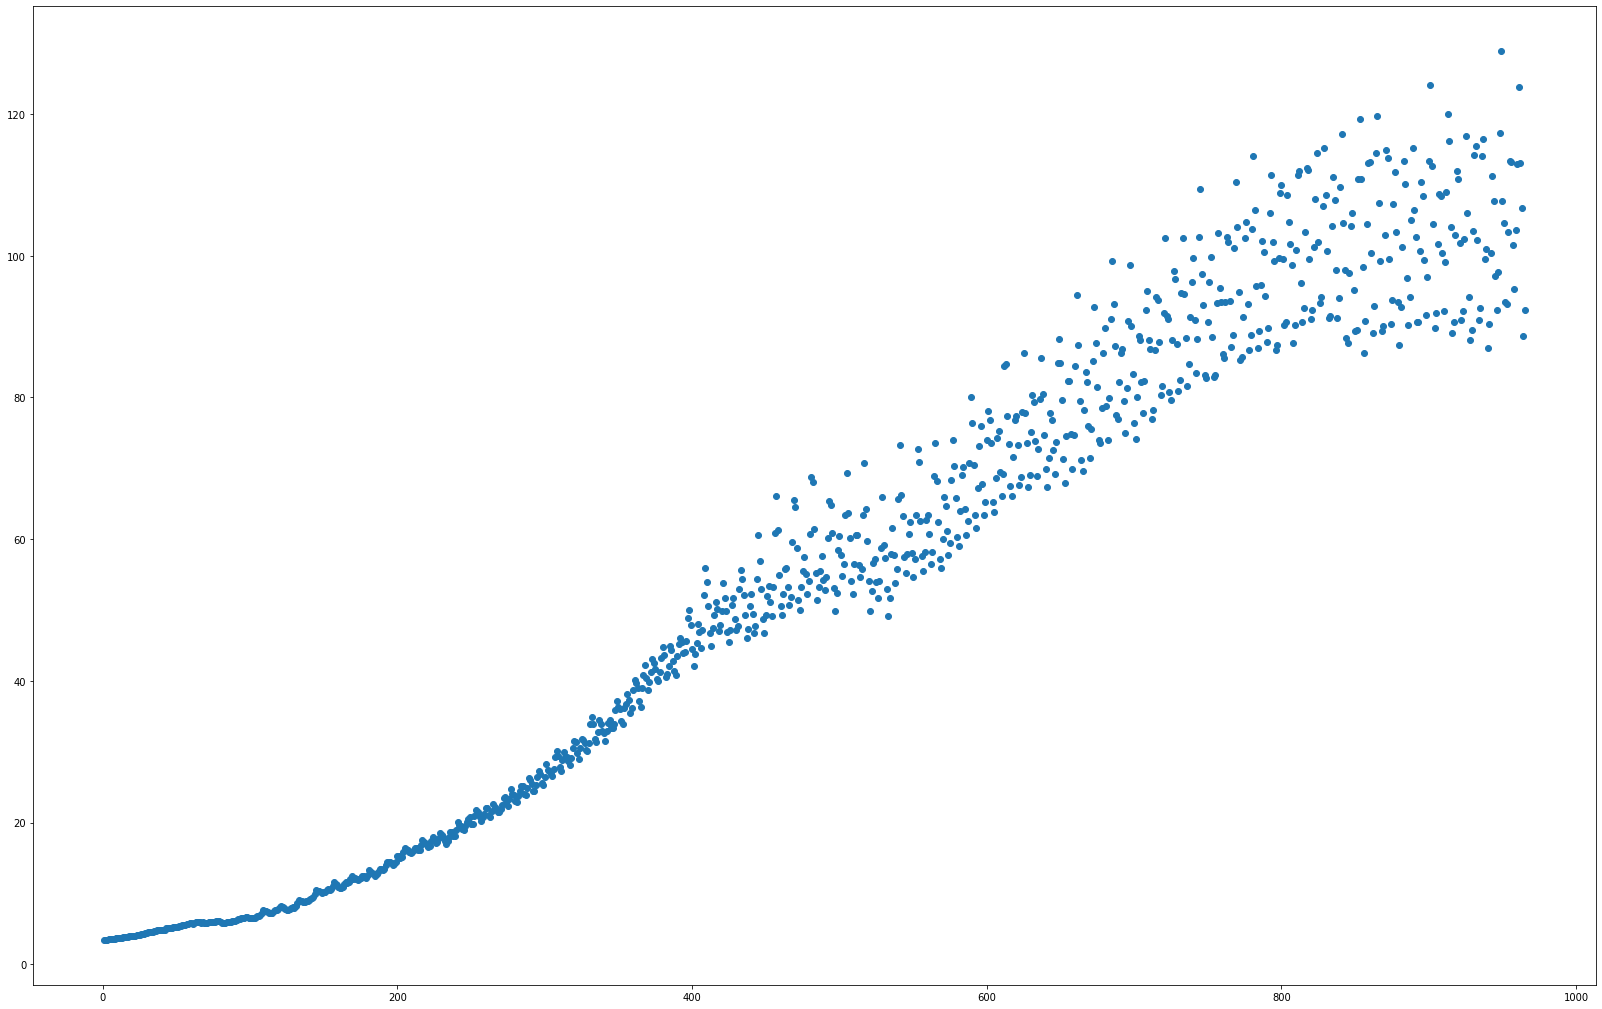

In [27]:
from matplotlib.pyplot import *

# plot for x and y values
plt.figure(figsize=(28,18))
plot(x,y,'o')

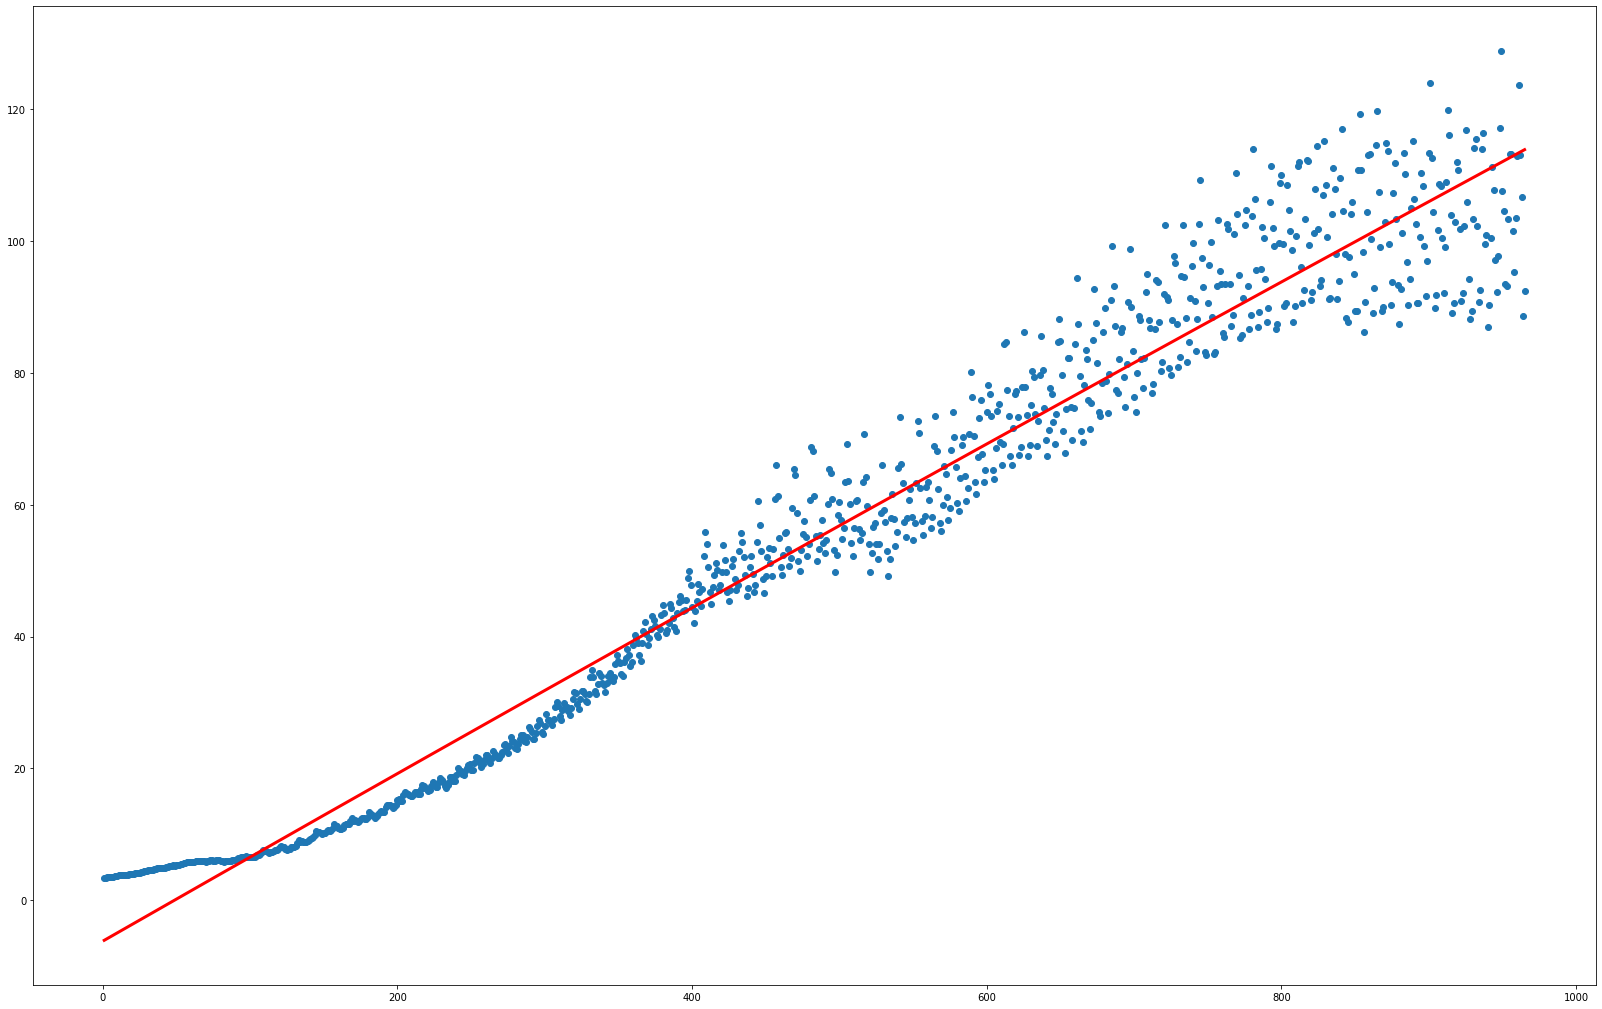

In [28]:
# Add the polynomial line 

plt.figure(figsize=(28,18))
plot(x,y,'o')
plot(x,polyval(p2,x), 'r-', linewidth=3)

### MSE

In [29]:
# curve fit the test data
fittedParameters = np.polyfit(x, y, 2)

# predict a single value
# 2019-06-01 (next month) -- number 966

print('"2019-06-01"')
print('Single value prediction:', np.polyval(fittedParameters, 966))
print()

# Use polyval to find model predictions
modelPredictions = np.polyval(fittedParameters, x)
absError = modelPredictions - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # root mean squared errors

print('Mean Square Error: ', MSE)
print()
print('Root Mean Square Error: ', RMSE)
  

"2019-06-01"
Single value prediction: 114.02192259647776

Mean Square Error:  47.066725382902575

Root Mean Square Error:  6.860519323119976


## The Second Model (15 free parameters)

In [30]:
# 15 parameters (14th degree)
p14 = polyfit(x,y,14)
print(p14)

[ 4.17554621e-36 -7.63895617e-32  3.86527158e-28 -9.84148946e-25
  1.51319255e-21 -1.52148726e-18  1.03768431e-15 -4.85906342e-13
  1.55311259e-10 -3.31222020e-08  4.51256472e-06 -3.64223162e-04
  1.54248044e-02 -2.38580995e-01  4.55488788e+00]


In [31]:
# ------ MSE ------- #
f = polyval(p14,x)
fit_error = y-f
MSE = sum((fit_error)**2)/965
print(MSE)


31.202239167256455


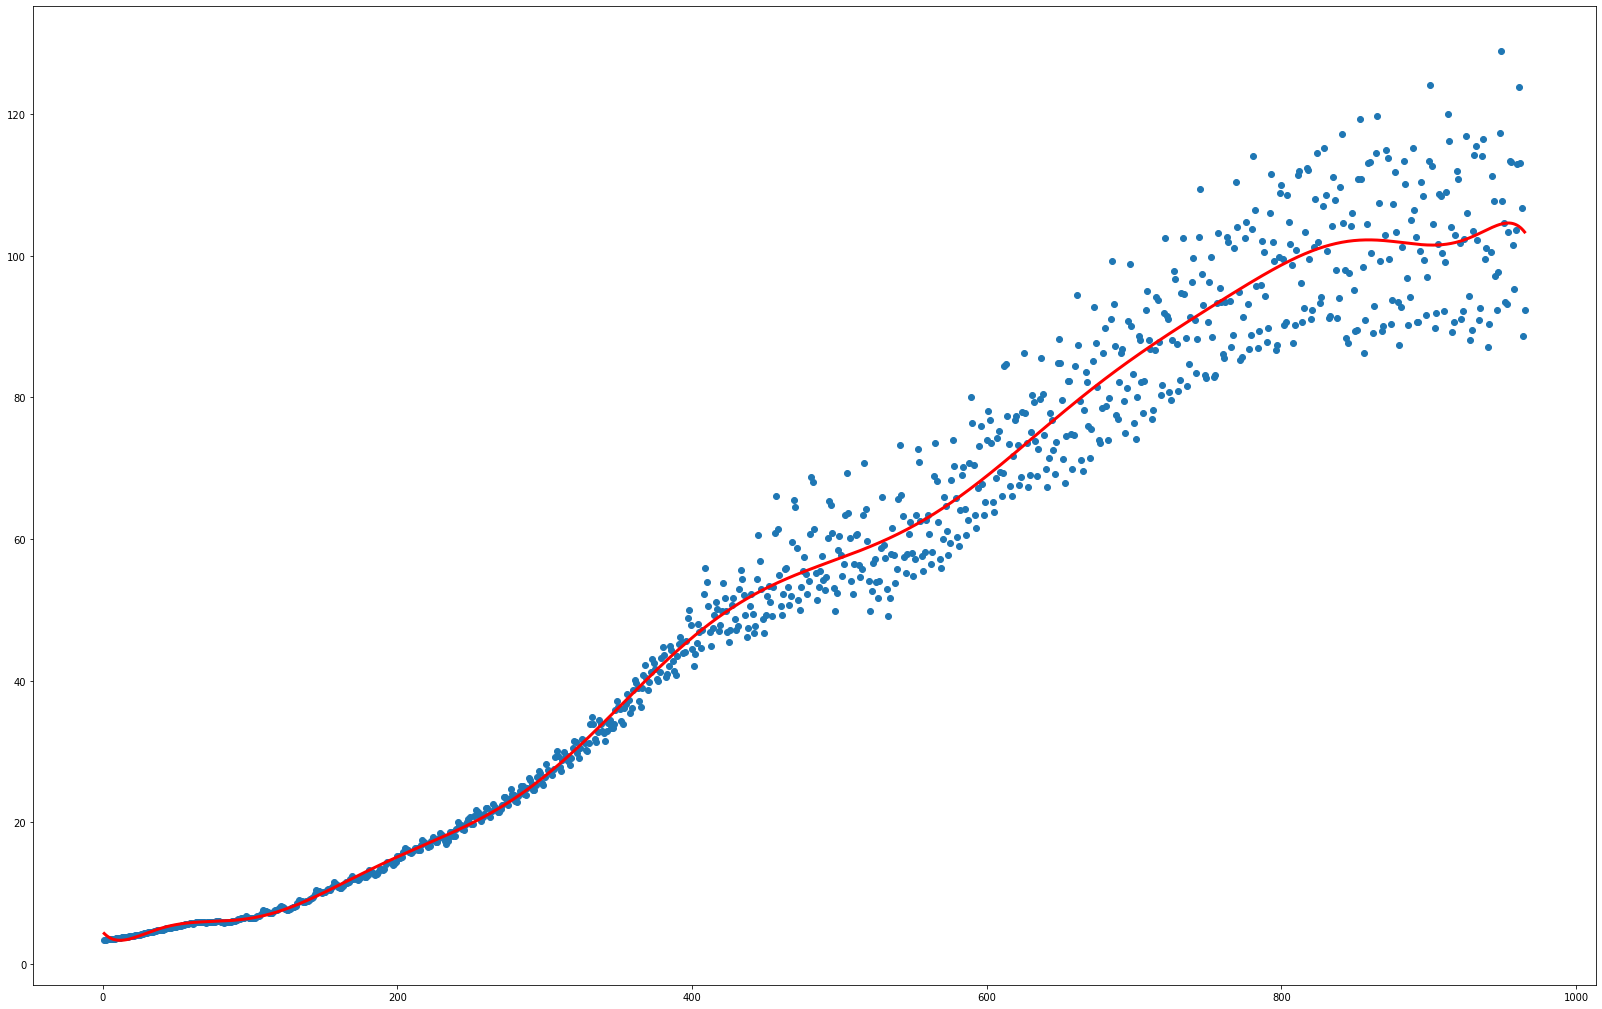

In [32]:
plt.figure(figsize=(28,18))
plot(x,y,'o')
plot(x,polyval(p14,x), 'r-', linewidth=3)

### MSE

In [33]:
# -------------- Mean Square Error ----------------#
# curve fit the test data
fittedParameters = np.polyfit(x, y, 14)

# predict a single value
# 2019-06-01 (next month) -- number 966

print('"2019-06-01"')
print('Single value prediction:', np.polyval(fittedParameters, 966))
print()

# Use polyval to find model predictions
modelPredictions = np.polyval(fittedParameters, x)
absError = modelPredictions - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # root mean squared errors

print('Mean Square Error: ', MSE)
print()
print('Root Mean Square Error: ', RMSE)


"2019-06-01"
Single value prediction: 103.04818606340662

Mean Square Error:  31.202239167256455

Root Mean Square Error:  5.585896451533671


## The Third Model (75 free parameters)

In [34]:
# 75 parameters (74th degree)
p74 = polyfit(x,y,74)
print(p74)

[-0.00000000e+000  0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  1.84444576e-143
 -1.03442238e-139  8.98838261e-137  1.01882528e-133 -1.22310684e-131
 -1.04705172e-127 -1.03142289e-124 -2.56199132e-122  6.47545365e-119
  1.10475637e-115  8.97421456e-113  2.02371569e-110 -5.70338897e-107
 -1.01412005e-103 -9.22674455e-101 -3.69685245e-098  3.47177774e-095
  8.62506713e-092  9.22433982e-089  5.08117706e-086 -1.55892357e-083
 -7.13418296e-080 -8.61406060e-077 -5.18198019e-074  1.16648988e-071
  6.59119355e-068  7.63429221e-065  3.52712334e-062 -2.94453925e-059
 -6.99825953e-056 -5.31115725e-053  8.91694411e-051  6.07866880e-047
  4.98383231e-044 -1.56729084e-041

C:\Users\niping1\anaconda3\lib\site-packages\numpy\lib\polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\niping1\anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\niping1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


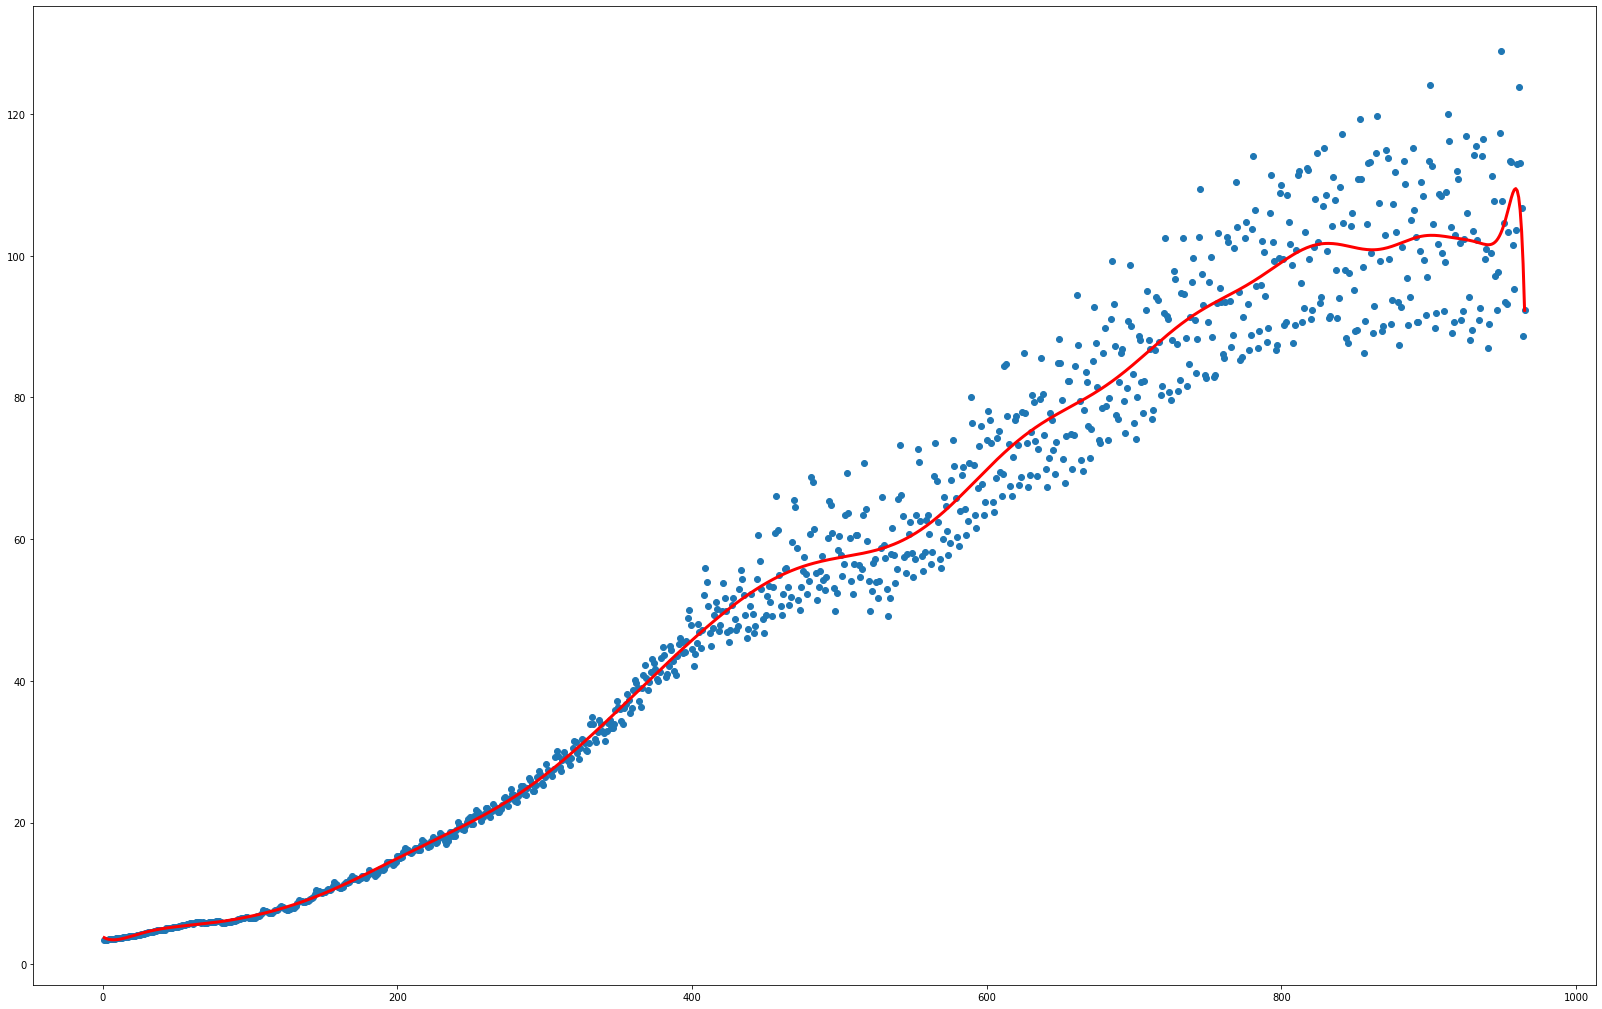

In [35]:
plt.figure(figsize=(28,18))
plot(x,y,'o')
plot(x,polyval(p74,x), 'r-', linewidth=3)

### MSE


In [36]:
# -------------- Mean Square Error ----------------#
# curve fit the test data
fittedParameters = np.polyfit(x, y, 74)

# predict a single value 
# 2019-06-01 (next month) -- number 966

print('"2019-06-01"')
print('Single value prediction:', np.polyval(fittedParameters, 966))
print()

# Use polyval to find model predictions
modelPredictions = np.polyval(fittedParameters, x)
absError = modelPredictions - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # root mean squared errors

print('Mean Square Error: ', MSE)
print()
print('Root Mean Square Error: ', RMSE)


"2019-06-01"
Single value prediction: 83.14796209434255

Mean Square Error:  30.50566097963318

Root Mean Square Error:  5.523193005828529


C:\Users\niping1\anaconda3\lib\site-packages\numpy\lib\polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\niping1\anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\niping1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Plot Summary

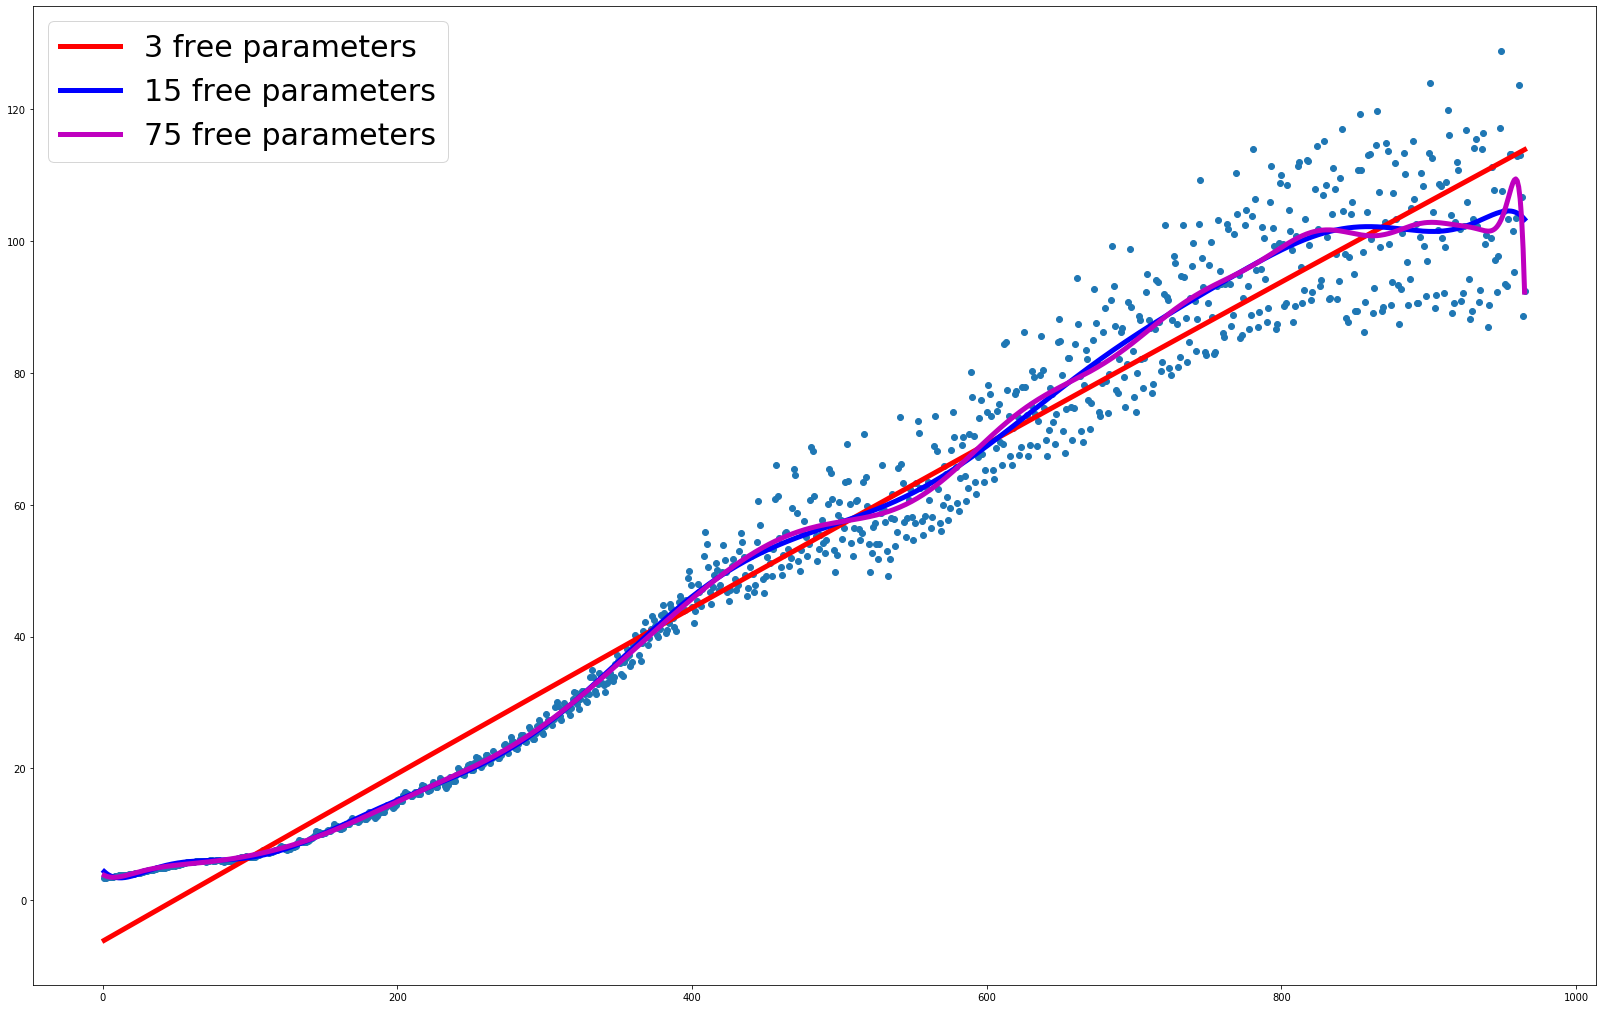

In [37]:
plt.figure(figsize=(28,18))
plot(x,y,'o')

plot(x,polyval(p2,x), 'r-', linewidth=5, label='3 free parameters')
plot(x,polyval(p14,x), 'b', linewidth=5, label='15 free parameters')
plot(x,polyval(p74,x), 'm', linewidth=5, label='75 free parameters')
legend(loc='upper left', prop={'size': 30})